# Instalar flask

* `mkdir server`
* `cd server`
* Instalar venv (Python Virtual Environment): `python3 -m pip install --user virtualenv`
* Crear un virtual environment para instalar las dependencias: `python3 -m venv venv`
* Instalar venv
* Activar el Environment: `. venv/bin/activate`
* Instalar Flask (servidor web): `pip install Flask`
* Instalar CORS en Flask: `pip install -U flask-cors`

# Crear la aplicación de Python

* Crear un archivo llamado `hello.py` dentro de la carpeta `./server`
* En el archivo escribir el siguiente código:

```
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, this is my first server for deploying Machine Learning models'
```

En la consola ejecutar:

* `export FLASK_APP=hello.py`
* `flask run`

Para que funcione el auto-reload:

* `FLASK_APP=hello.py FLASK_ENV=development flask run`

Ir al navegador de Internet y buscar el sitio: `http://localhost:5000/`. Deberian ver la siguiente imagen:

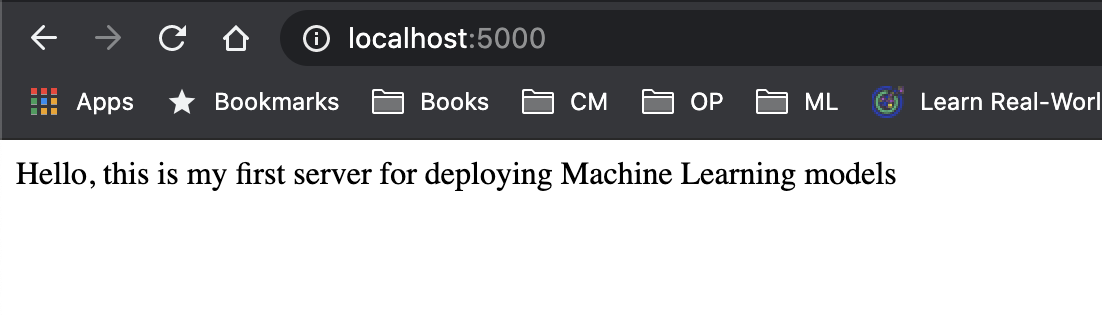






# Exponer la URL en Internet de manera pública

* Crearse una cuenta en ngrok: https://dashboard.ngrok.com/get-started/setup
* Bajarse ngrok en su sistema operativo
* En la misma carpeta donde se bajaron ngrok ejecutar: `./ngrok authtoken 1TbCUJeKqoucGqxsLQFpFrcu77u_87ed32D2fV4R9UUf7SMVH`. Reemplazar el token por el que les muestra en su cuenta gratuita de ngrok en el dashboard.
* Finalmente ejecutar en consola `./ngrok http 5000`
* Deberian ver en la consola la siguiente información:

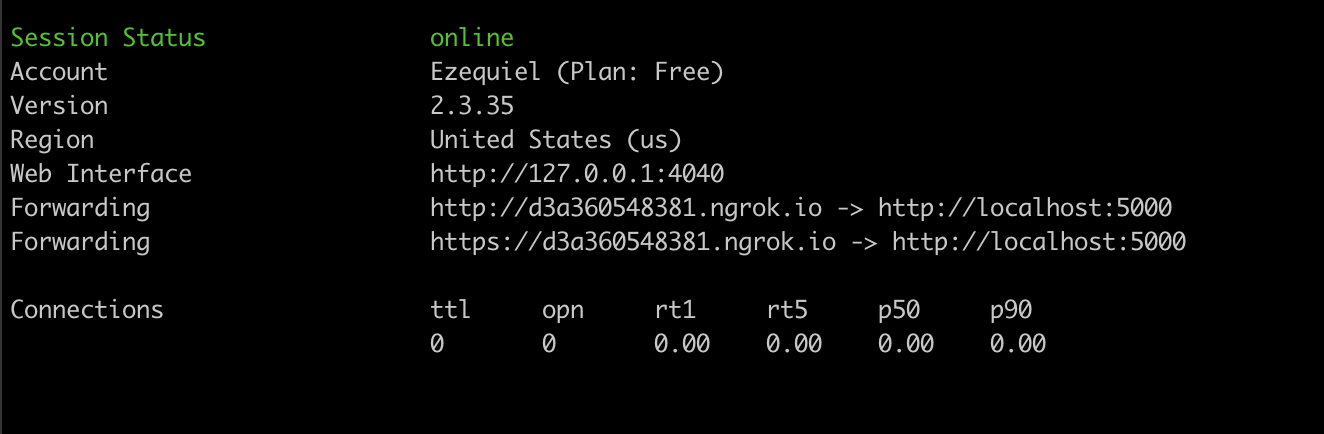

Utilicen en su celular o computadora la dirección que les muestra la consola, en mi caso: `https://d3a360548381.ngrok.io`. Esto les permite acceder desde cualquier lugar al servidor web que tienen corriendo localmente en su computadora en el puerto `5000`. De esa manera, cualquier puede consumir predicciones de los modelos de Machine Learning que vamos a construir. Esto no esta pensando para un ambiente de producción, pero es muy útil para hacer pruebas.

Si hicieron todo bien deberian volver a ver en el navegador el mensaje: `Hello, this is my first server for deploying Machine Learning models`

# Dataset y problema de Machine Learning

Descargarse el dataset del siguiente link: https://drive.google.com/file/d/1CMvr_HPpkYc4xgK9Pfd8CVGPalHUvAoY/view?usp=sharing

En este problema de Machine Learning tenemos datos sobre caracteristicas de diferentes vinos y en base a dichas caracteristicas, queremos predecir la calidad de los vinos.

La variable de salida que queremos predecir es `quality`.

# Instalar TensorFlow y Keras

* pip install tensorflow
* pip install keras


# Dataset y problema de Machine Learning


In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")
!ls

Mounted at /content/drive
'03 - Introducción a la clasificación con Keras'
'04 - Detección de anomalías con Keras'
'05 - Embeddings con Keras'
'06 - Autoencoders con Keras'
'07 - Integrador.ipynb'
'CV2 - 01 - Capas_convolucionales.ipynb'
'CV2 - 02 red_cnn_simple.ipynb'
'CV2 - 03 Modelo_convolucional_aplicacion_keras.ipynb'
 data
 desorden
'Machine Learning 1 - 8.1 Boosting.ipynb'
'Machine Learning 1 - 8.2 Bagging.ipynb'
 model.h5
 model.json
 model_plot.png


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

In [3]:
dataset = pd.read_csv('data/class_7_wine_dataset_v2.csv')

# Analisis básico de datos

* Imprimir las primeras filas del dataset
* Imprimir los tipos de datos de cada columna
* Describir cada columna con estadisticas basicas
* Ver la distribución de la variable a predecir (quality)
* Transformar la variable a predecir en un problema de clasificación binario
* Analizar el vendor id. Cuantos vendor id unicos hay?

In [4]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375


In [5]:
dataset.dtypes

Unnamed: 0                int64
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
vendor_id                 int64
dtype: object

In [6]:
dataset.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000,6497.000000
mean,3248.000000,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378,331.422657
std,1875.666681,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255,91.939412
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,1624.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,265.000000
50%,3248.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,330.000000
75%,4872.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,387.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,693.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9902dd0128>]],
      dtype=object)

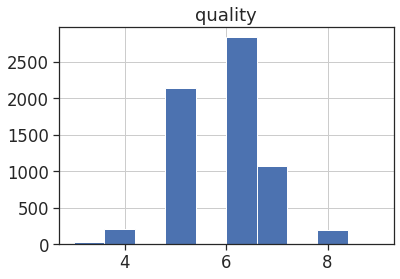

In [7]:
dataset.hist('quality')

In [8]:
dataset['binary_quality'] = dataset.quality.apply(lambda label: 0 if (label >=3) and (label<6) else 1 )

In [9]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id,binary_quality
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369,1
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361,1
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354,1
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325,1
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375,1


In [10]:
print(dataset[dataset['binary_quality']==0].shape)
print(dataset[dataset['binary_quality']==1].shape)

(2384, 16)
(4113, 16)


In [11]:
vendor_id = dataset['vendor_id']
print("Cantidad de vendedores únicos {}".format((np.unique(vendor_id).shape)))

Cantidad de vendedores únicos (500,)


# Limpieza de datos

* Analizar la cantidad de NaNs
* Darle un tratamiento a los NaNs
* Verificar no estar cambiando las distribuciones

In [12]:
ds_with_nans = dataset.loc[dataset.isna().sum(axis=1)>=1,:]
ds_without_nans = dataset.loc[dataset.isna().sum(axis=1)==0,:]
print(ds_with_nans.shape,ds_without_nans.shape)

(34, 16) (6463, 16)


In [13]:
# Como los NaNs son pocos directamente los tiramos.
dataset = ds_without_nans

# Ingeniería de features básica

* Transformar el tipo en one-hot-encoding
* Hacer un analisis de correlaciones
* Hacer plot-box de las variables mas correlacionadas con la salida
* Transformar el vendor id en vendor idx
* Separar los datos en train (70%), validation (20%) y test (10%).
* Normalizar los datos para probar modelos con datos normalizados y sin normalizar

In [14]:
type_dummies = pd.get_dummies(dataset.type,prefix='type')
dataset_encoded = pd.concat([dataset,type_dummies], axis=1)
print(dataset_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  binary_quality       

In [15]:
final_dataset = dataset_encoded.drop(['Unnamed: 0','type'], axis=1, inplace=False)
print(final_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
 12  vendor_id             6463 non-null   int64  
 13  binary_quality        6463 non-null   int64  
 14  type_red              6463 non-null   uint8  
 15  type_white           

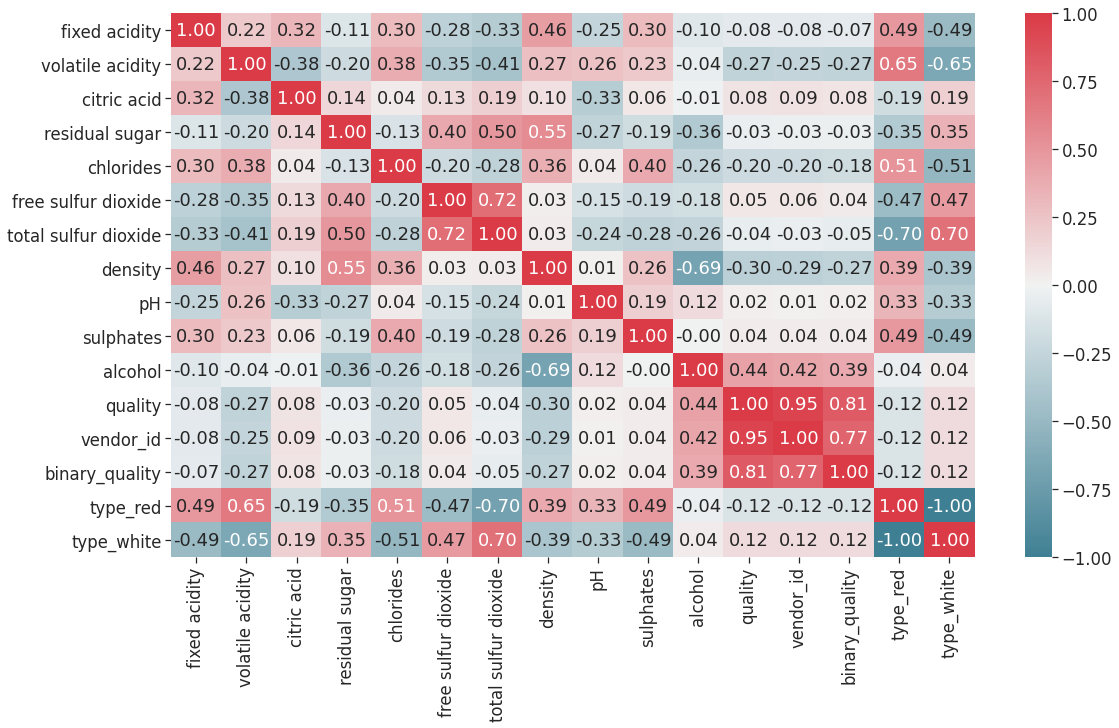

In [16]:
fig, ax1 = plt.subplots(1, figsize=(18,10))
corr = final_dataset.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=1.5)

Importante!
- Un error común es creer que porque una variable de entrada no está correlacionada con la salida entonces se puede tirar. Muchas veces, la correlación aparece cuando se combinan variables de entrada.


{'boxes': [<matplotlib.lines.Line2D at 0x7f98feb1c5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98feac1080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98feac1ba8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98feac17f0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f98feb1c8d0>,
  <matplotlib.lines.Line2D at 0x7f98feacb6d8>]}

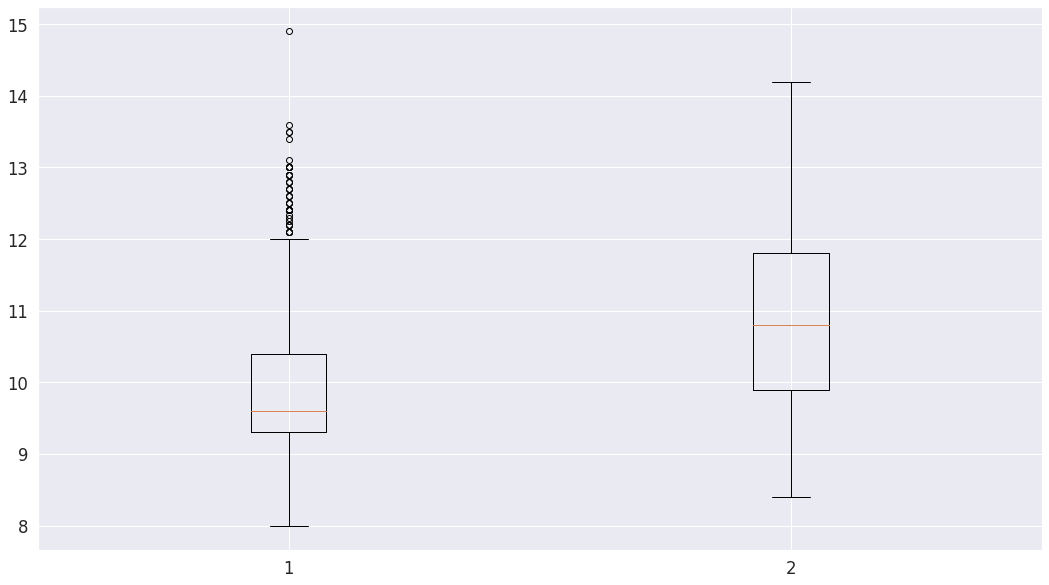

In [17]:
fig, ax = plt.subplots(1, figsize=(18,10))
ax.boxplot( [ 
  final_dataset.loc[final_dataset['binary_quality']==0,'alcohol' ],
  final_dataset.loc[final_dataset['binary_quality']==1,'alcohol' ] 
] )

In [18]:
# transformar vendor_id en index
vendor_id = final_dataset['vendor_id'].to_numpy()
print(vendor_id.max())
print(vendor_id.min())
print(np.unique(vendor_id).shape)

_, vendor_idx = np.unique(vendor_id, return_inverse=True)

vendor_id2idx = { id:idx for id,idx in zip(vendor_id,vendor_idx)}

print(vendor_id2idx[693])

693
1
(500,)
499


separar los datos en train(70%), valid(20%) y test(10%))

X:
  - x_train             # todas las cols menos binary_quality, quality, vendor_id
  - x_validation
  - x_test

Y:
- y_train            # la columna binary_quality
- y_validation
- y_test

vendor_idx:
- vendor_idx_train  # la columna vendor_id transformada a vendor_idx con el diccionario
- vendor_idx_validation
- vendor_idx_test


In [19]:
final_dataset_2 = final_dataset.drop(['binary_quality', 'quality', 'vendor_id'], axis=1, inplace=False)
n_samples = final_dataset_2.shape[0]
indexes = np.random.permutation(np.arange(0, n_samples))
train_idx = indexes[0:int(0.7*n_samples)]
validation_idx = indexes[int(0.7*n_samples): int(0.9*n_samples)]
test_idx = indexes[int(0.9*n_samples):]
assert n_samples == train_idx.size + validation_idx.size + test_idx.size
y = final_dataset.binary_quality
x_train = final_dataset_2.iloc[train_idx,:]
vendor_idx_train = vendor_idx[train_idx]
y_train = y.iloc[train_idx].to_numpy()
x_validation = final_dataset_2.iloc[validation_idx,:]
vendor_idx_validation = vendor_idx[validation_idx]
y_validation = y.iloc[validation_idx].to_numpy()
x_test = final_dataset_2.iloc[test_idx, :]
vendor_idx_test = vendor_idx[test_idx]
y_test = y.iloc[test_idx].to_numpy()

In [20]:
# normalizar los datos para que vayan entre 0 y 1
min_max_scaler = preprocessing.MinMaxScaler()

x_train_norm = min_max_scaler.fit_transform(x_train)
x_validation_norm = min_max_scaler.fit_transform(x_validation)
x_test_norm = min_max_scaler.fit_transform(x_test)

print(x_train_norm.min())
print(x_train_norm.max())

0.0
1.0000000000000002


# Modelo base

* Hacer una clase que tenga el metodo fit y transform, pero que devuelva resultados completamente random.
* Cual deberia ser el valor del AUC de este modelo?
* Calcular el AUC con sklearn


In [21]:
class RandomModel(object):
  def fit(self,X,y):
    return None
  def predict(self,X):
    return np.random.randint(0,1,size=X.shape[0])

random_model = RandomModel()
random_model.fit(x_train_norm,y_train)
rm_predictions = random_model.predict(x_validation_norm)

fpr,tpr,thresholds = metrics.roc_curve(y_validation,rm_predictions)
print(metrics.auc(fpr,tpr))

0.5


# Regresión logística

* Entrenar un modelo de regresión logística con los datos sin normalizar.
* Entrenar un modelo de regresión logística con los datos normalizados.
* Cual es el motivo de la diferencia?
* Si la regresión logística no da un buen resultado, cual puede ser un motivo posible?

In [22]:
lr_model = LogisticRegression(C=1, solver="sag", max_iter=1000)
lr_model.fit(x_train_norm,y_train)

lr_predictions = lr_model.predict(x_validation_norm)

fpr,tpr,thresholds = metrics.roc_curve(y_validation,lr_predictions)
print(metrics.auc(fpr,tpr))


0.7175520195838433


# Random forest

* Entrenar un modelo de Random Forest con los datos sin normalizar.
* Entrenar un modelo de Random Forest con los datos normalizados.
* Hay diferencia? Si no la hay, cual es el motivo?

In [23]:
rf_model = RandomForestClassifier(n_estimators=1000,max_depth=None,random_state=0)
rf_model.fit(x_train_norm,y_train)

rf_predictions = rf_model.predict(x_validation_norm)

fpr,tpr,thresholds = metrics.roc_curve(y_validation,rf_predictions)
print(metrics.auc(fpr,tpr))

0.7230110159118728


In [24]:
rf_model = RandomForestClassifier(n_estimators=1000,max_depth=None,random_state=0)
rf_model.fit(x_train,y_train)

rf_predictions = rf_model.predict(x_validation)

fpr,tpr,thresholds = metrics.roc_curve(y_validation,rf_predictions)
print(metrics.auc(fpr,tpr))

0.7938066095471237


# Deep learning sin embeddings

* Entrenar un modelo de deep learning con un solo hidden layer y con los datos normalizados.
* Que función de activación debería utilizar en la salida? Cual es el motivo?

In [33]:
# hidden layer de 100 neuronas
# como seria el layer de salida?
def create_model():
  # create model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(100,activation='relu'))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  return model

model = create_model()

metrics = [
    tf.keras.metrics.AUC()
]

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics
)

model.fit(
    x_train_norm.astype(np.float32), 
    y_train.astype(np.float32),
    epochs=10,
    batch_size=64,
    validation_data=(x_validation_norm, y_validation),
)

Epoch 1/10
71/71 [==============================] - 0s 6ms/step - loss: 0.5874 - auc_1: 0.7173 - val_loss: 0.5731 - val_auc_1: 0.7840
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.5345 - auc_1: 0.7838 - val_loss: 0.5702 - val_auc_1: 0.7896
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.5235 - auc_1: 0.7956 - val_loss: 0.5528 - val_auc_1: 0.7903
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.5270 - auc_1: 0.7911 - val_loss: 0.5542 - val_auc_1: 0.7880
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.5157 - auc_1: 0.8033 - val_loss: 0.5606 - val_auc_1: 0.7906
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 0.5165 - auc_1: 0.8027 - val_loss: 0.5888 - val_auc_1: 0.7927
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.5143 - auc_1: 0.8046 - val_loss: 0.5498 - val_auc_1: 0.7932
Epoch 8/10
71/71 [==============================] - 0s 4ms/ste

In [26]:
print(x_train.shape)
print(x_test.shape)

(4524, 13)
(647, 13)


In [47]:
# Ver qué pasa acá!
# In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 
# 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.
y_pred = model.predict(x_test_norm)
threeshold = 0.5
y_pred_classes = (y_pred[:,0] < threeshold).astype(int)

y_pred_classes,y_test

(array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 

# Deep learning con embeddings

* Entrenar un modelo de deep learning con un solo hidden layer y con los datos normalizados.
* Se utiliza el vendor id o el vendor idx como input? Cual es el motivo?
* Si los resultados son mejores, cuál puede ser el motivo?

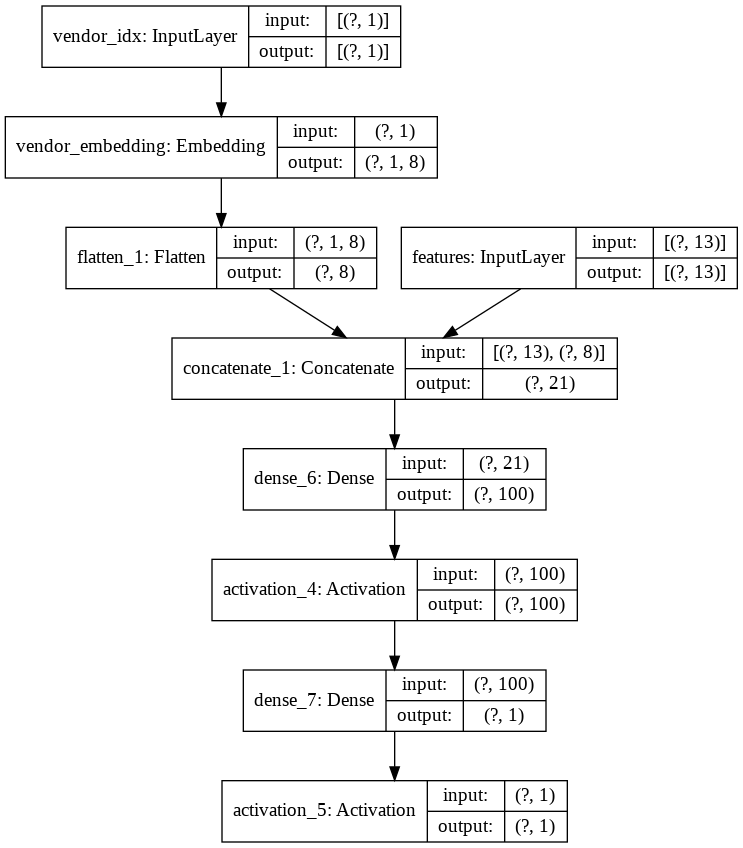

In [50]:
def create_model_with_embeddings():
  features_input= tf.keras.Input(shape=(13,), name='features')
  vendor_idx_input = tf.keras.Input(shape=(1,), name='vendor_idx')
  
  vendor_embedding = tf.keras.layers.Embedding(
      vendor_idx.max()+1,
      8,
      input_length=1,
      name="vendor_embedding")(vendor_idx_input)
  
  vendor_embedding = tf.keras.layers.Flatten()(vendor_embedding)

  concatenated = tf.keras.layers.Concatenate()([features_input,vendor_embedding])

  out = tf.keras.layers.Dense(100)(concatenated)
  out = tf.keras.layers.Activation('relu')(out)
  out = tf.keras.layers.Dense(1)(out)
  out = tf.keras.layers.Activation('sigmoid')(out)

  model = tf.keras.Model(
      inputs = [features_input,vendor_idx_input],
      outputs = out,
  )
  return model

model2 = create_model_with_embeddings()

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics
)

plot_model(model2,to_file="model_plot.png",show_shapes=True,show_layer_names=True)

In [51]:
model2 = create_model_with_embeddings()

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=metrics
)

model2.fit(
    [x_train_norm.astype(np.float32),vendor_idx_train.astype(np.float32)],
    y_train.astype(np.float32),
    epochs=10,
    batch_size=16,
    validation_data=[[x_validation_norm,vendor_idx_validation],y_validation]
)

# Ver qué rompí...

Epoch 1/10
283/283 [==============================] - 1s 4ms/step - loss: 0.1080 - auc_1: 0.9695 - val_loss: 0.0000e+00 - val_auc_1: 0.0000e+00
Epoch 2/10
283/283 [==============================] - 1s 4ms/step - loss: 2.1874e-04 - auc_1: 1.0000 - val_loss: 0.0000e+00 - val_auc_1: 0.0000e+00
Epoch 3/10
283/283 [==============================] - 1s 4ms/step - loss: 5.1562e-05 - auc_1: 1.0000 - val_loss: 0.0000e+00 - val_auc_1: 0.0000e+00
Epoch 4/10
283/283 [==============================] - 1s 4ms/step - loss: 2.7948e-05 - auc_1: 1.0000 - val_loss: 0.0000e+00 - val_auc_1: 0.0000e+00
Epoch 5/10
283/283 [==============================] - 1s 4ms/step - loss: 1.7397e-05 - auc_1: 1.0000 - val_loss: 0.0000e+00 - val_auc_1: 0.0000e+00
Epoch 6/10
283/283 [==============================] - 1s 4ms/step - loss: 1.1713e-05 - auc_1: 1.0000 - val_loss: 0.0000e+00 - val_auc_1: 0.0000e+00
Epoch 7/10
283/283 [==============================] - 1s 4ms/step - loss: 8.3262e-06 - auc_1: 1.0000 - val_loss: 0.0

# Probar el modelo

* Generar predicciones y compararla con la verdad.
* Como se transforma la salida de la red neuroanl en una clase?

In [49]:
y_pred = model.predict(x_test_norm)
threeshold = 0.5
y_pred_classes = (y_pred[:,0] < threeshold).astype(int)
y_test,y_pred_classes

(array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 

# Guardar el modelo

* Guardar el modelo en un archivo
* Descargar el archivo
* Utilizar el modelo descargado en el servidor de flask
* Por que es necesario exportar los diccionarios que transformar vendor id a vendor idx?
* Por que es necesario exportar los parametros de normalización?

In [52]:
!pip list | grep tensorflow

tensorflow                    2.3.0          
tensorflow-addons             0.8.3          
tensorflow-datasets           2.1.0          
tensorflow-estimator          2.3.0          
tensorflow-gcs-config         2.3.0          
tensorflow-hub                0.9.0          
tensorflow-metadata           0.24.0         
tensorflow-privacy            0.2.2          
tensorflow-probability        0.11.0         


Exportación de modelo

In [62]:
!mkdir -pv models/clase7

In [63]:
model.save("models/clase7/model_embed.h5")

Guardar tabla de Vendor Ids

In [64]:
from sklearn.externals import joblib 

joblib.dump(vendor_id2idx, 'models/clase7/vendor_id2idx.pkl') 

['models/clase7/vendor_id2idx.pkl']

Guardar parámetros de normalización


In [65]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit_transform(x_train)
joblib.dump(min_max_scaler, 'models/clase7/scaler.pkl') 

['models/clase7/scaler.pkl']